# Face Detection with Python using OpenCV
###  This tutorial will introduce you to the concept of object detection in Python using OpenCV library and how you can utilize it to perform tasks like Facial detection.

<h3> computer vision </h3>
<P> It allows computers to derive insight from visual input such as images and video files. <p>

## introduction to openCv
<p> OpenCV is a computer vision library that supports programming languages like Python, C++, and Java.OpenCV allows developers and non-mathematicians to build computer vision applications easily without having to code them from scratch. The library has over 2,500 algorithms that allow users to perform tasks like face recognition and object detection.</p> <h2>By the end of this tutorial:</h2><br>
<p>1. Detect human faces in images with OpenCV in Python<br>
2. Perform real-time face detection in a live stream from a webcam<br>
3. Recognize and label celebrity faces in images</p>


### Installing OpenCV for Python
pip install opencv-python

### step1. Import the openCv package

In [5]:
import cv2 as cv

In [9]:
#to check either import is working or not
imagepath = ".\my_group.jpg"
img = cv.imread(imagepath)
cv.imshow("Display window", img)
k = cv.waitKey(0)

### step 2. Read the image
- we need to read image with opencv's function imread()
- This will load the image from the specified file path and return it in the form of a Numpy array.

In [10]:
img= cv.imread(imagepath)
img

array([[[222, 168, 135],
        [224, 170, 137],
        [213, 159, 128],
        ...,
        [237, 166, 122],
        [236, 165, 121],
        [236, 165, 121]],

       [[220, 163, 131],
        [224, 170, 137],
        [221, 166, 135],
        ...,
        [238, 167, 123],
        [237, 166, 122],
        [237, 166, 122]],

       [[225, 166, 134],
        [226, 169, 137],
        [223, 166, 135],
        ...,
        [235, 167, 122],
        [234, 166, 121],
        [234, 166, 121]],

       ...,

       [[156, 161, 162],
        [153, 158, 159],
        [152, 157, 158],
        ...,
        [157, 148, 139],
        [159, 150, 141],
        [161, 152, 143]],

       [[155, 160, 161],
        [153, 158, 159],
        [154, 159, 160],
        ...,
        [160, 151, 142],
        [162, 153, 144],
        [162, 153, 144]],

       [[154, 159, 160],
        [151, 156, 157],
        [153, 158, 159],
        ...,
        [161, 152, 143],
        [164, 155, 146],
        [163, 154, 145]]

In [11]:
#let's print the dimention of this array
img.shape

(1066, 1600, 3)

<p> Notice that this is a 3-dimensional array. The array’s values represent the picture’s height, width, and channels respectively. Since this is a color image, there are three channels used to depict it - blue, green, and red (BGR). 
 Note that while the conventional sequence used to represent images is RGB (Red, Blue, Green), the OpenCV library uses the opposite layout (Blue, Green, Red)</p>

### step3. convert the image to grayscale
- To improve computational efficiency, we first need to convert this image to grayscale before performing face detection on it


In [12]:
gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [13]:
gray_image

array([[164, 166, 156, ..., 161, 160, 160],
       [160, 166, 163, ..., 162, 161, 161],
       [163, 166, 163, ..., 161, 160, 160],
       ...,
       [161, 158, 157, ..., 146, 148, 150],
       [160, 158, 159, ..., 149, 151, 151],
       [159, 156, 158, ..., 150, 153, 152]], dtype=uint8)

In [14]:
gray_image.shape
#Notice that this array only has two values since 
#image is grayscale and no longer has the third color channel.

(1066, 1600)

### step 4: Load the classifier
1. Let’s load the pre-trained Haar Cascade classifier that is built into OpenCV
2. Notice that we are using a file called haarcascade_frontalface_default.xml. This classifier is designed specifically for detecting frontal faces in visual input
3. OpenCV also provides other pre-trained models to detect different objects within an image - such as a person’s eyes, smile, upper body, and even a vehicle’s license plate.

In [22]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

### step 5 : perform the face detection
We can now perform face detection on the grayscale image using the classifier we just loaded

In [23]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

###### Let’s break down the methods and parameters
1. detectMultiScale():the detectMultiScale() method is used to identify faces of different sizes in the input image.
2. grey_image:The first parameter in this method is called grey_image, which is the grayscale image we created previously.
3. scaleFactor:This parameter is used to scale down the size of the input image to make it easier for the algorithm to detect larger faces. In this case, we have specified a scale factor of 1.1, indicating that we want to reduce the image size by 10
4. minNeighbors:Initially, the classifier will capture a large number of false positives. These are eliminated using the minNeighbors parameter, which specifies the number of neighboring rectangles that need to be identified for an object to be considered a valid detection.To summarize, passing a small value like 0 or 1 to this parameter would result in a high number of false positives, whereas a large number could lead to losing out on many true positives.
5. minSize:The minSize parameter sets the minimum size of the object to be detected.The model will ignore faces that are smaller than the minimum size specified.

### step6: drawing a bounding box
Now, that the model has detected the faces within the image, let’s run the following lines of code to create a bounding box around these faces

In [24]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

### step7:  Displaying the Imaget
To display the image with the detected faces, we first need to convert the image from the BGR format to RGB

In [25]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#### lets use the matplotlib to display the image

(-0.5, 1599.5, 1065.5, -0.5)

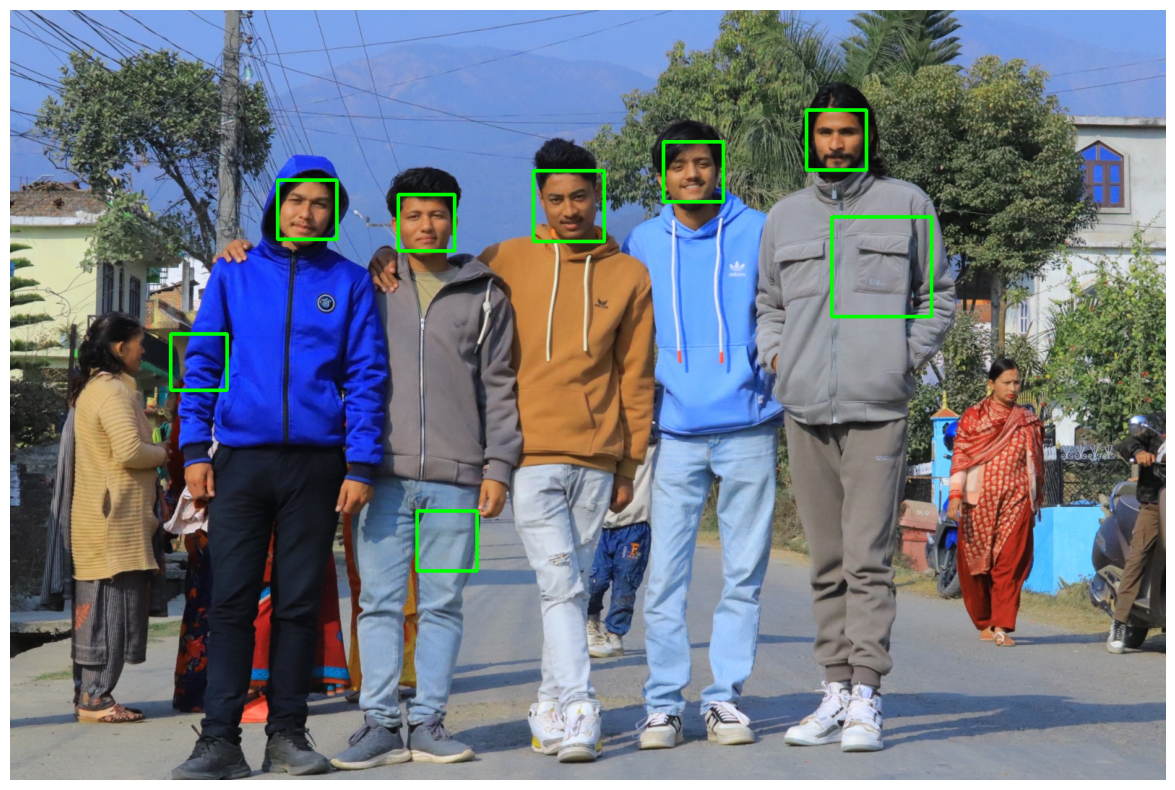

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')